# Civil Engineering Cement Strength Analysis

This notebook analyzes cement strength using a Random Forest Regressor, examining the relationship between key ingredients and concrete compressive strength in civil engineering.

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score

### Loading the Dataset

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cement-manufacturing-concrete-dataset/concrete.csv


In [3]:
df = pd.read_csv('/kaggle/input/cement-manufacturing-concrete-dataset/concrete.csv')
df.head(5)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

### Dataset Exploration 

In [4]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title = "Profile Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.shape

(1030, 9)

In [6]:
df.shape

(1030, 9)

<Axes: title={'center': 'Boxplot of Dataset'}>

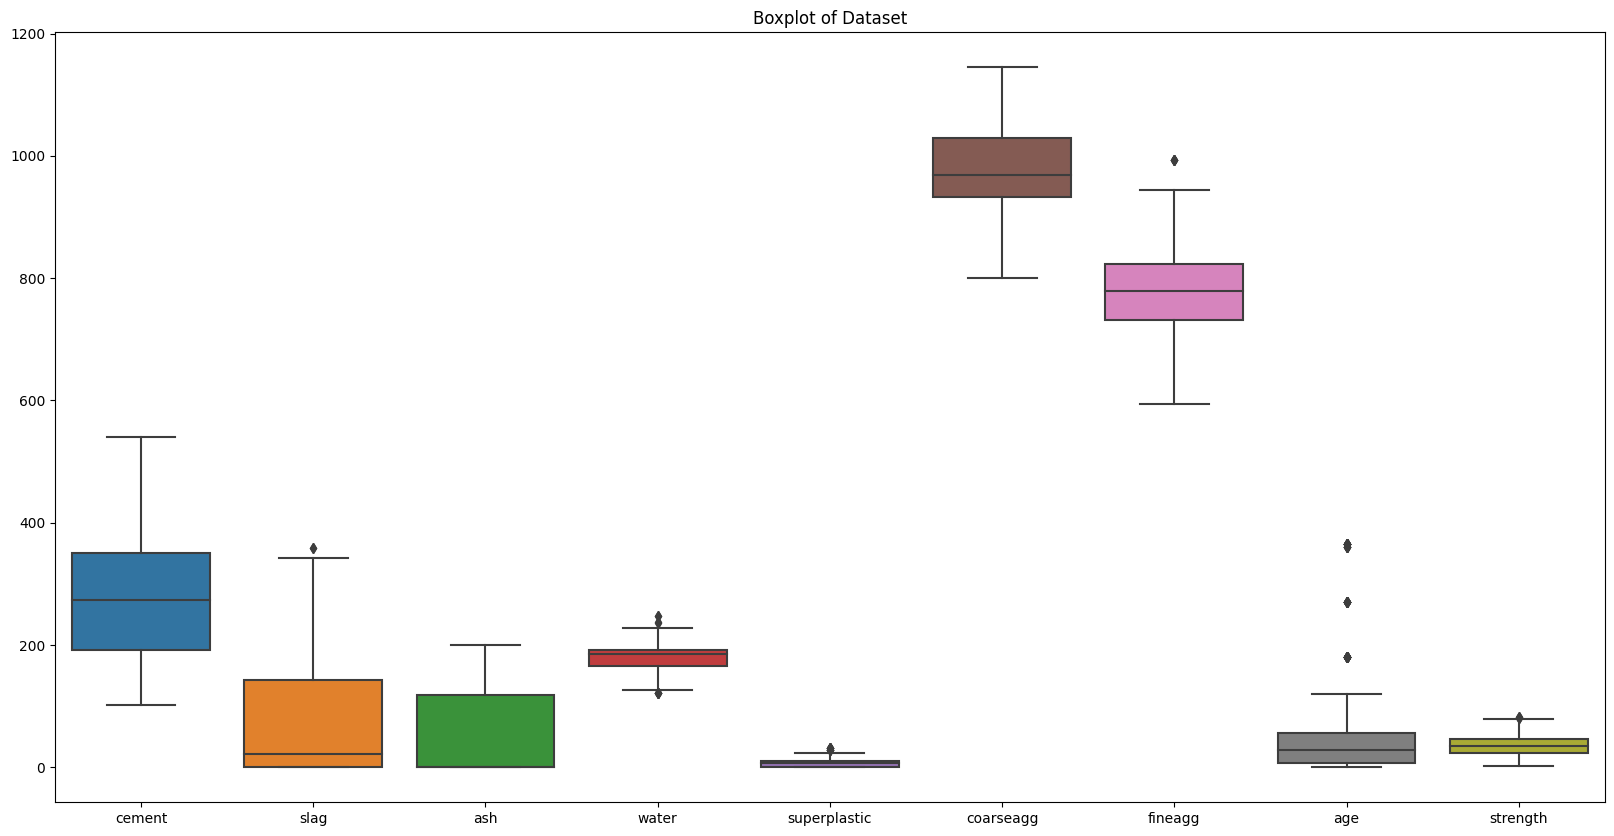

In [7]:
plt.figure(figsize=(20,10))
plt.title("Boxplot of Dataset")
sns.boxplot(data = df)

It can be observed that dataset contains outliers

<Axes: title={'center': 'Boxplot of Slag'}, xlabel='slag'>

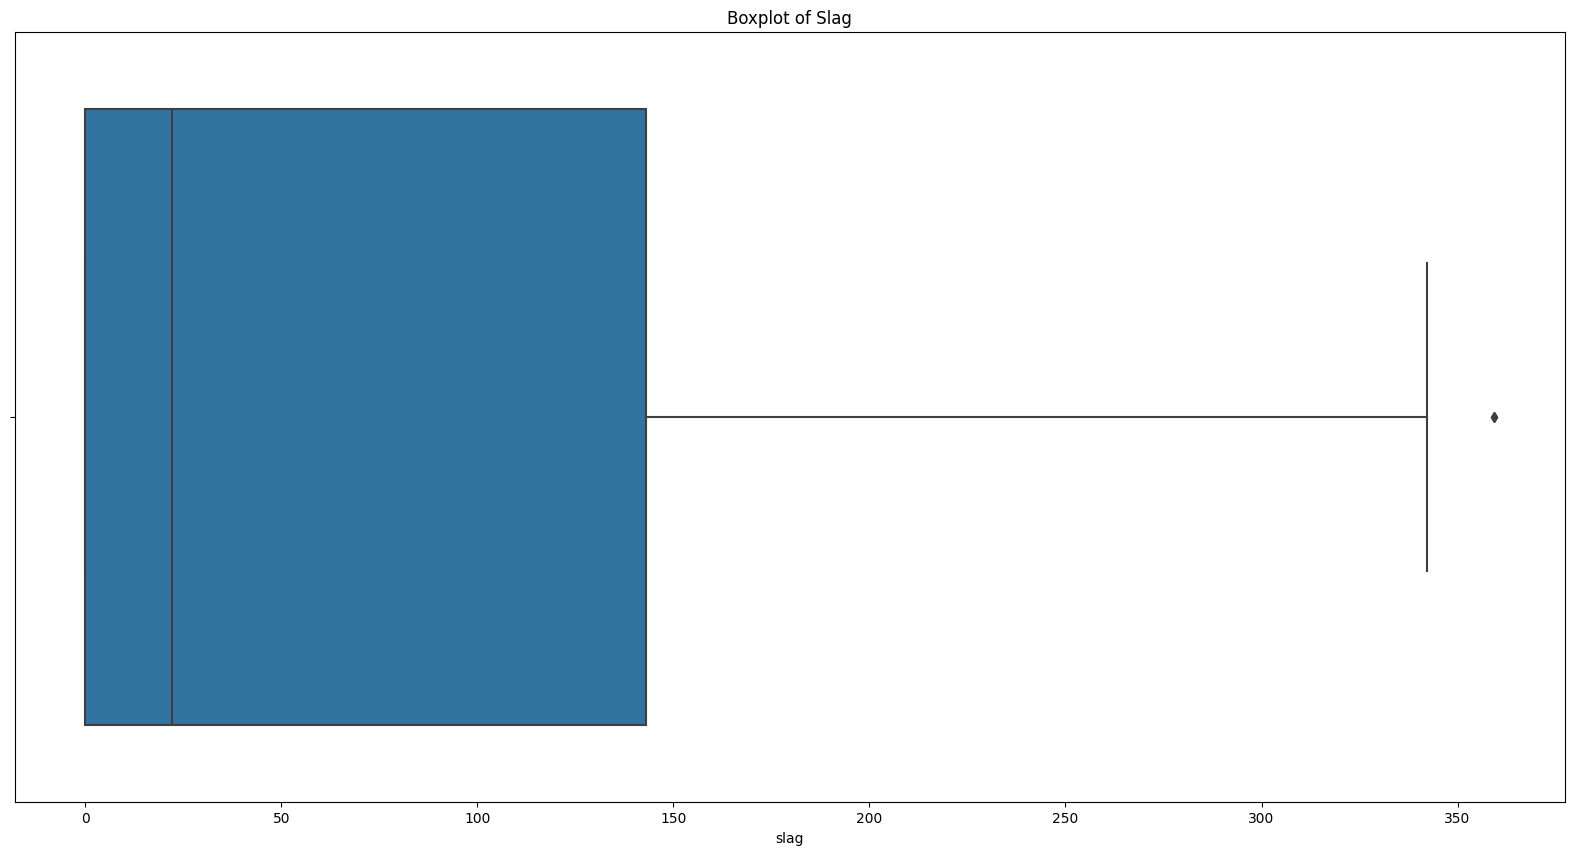

In [8]:
plt.figure(figsize= (20,10))
plt.title("Boxplot of Slag")
sns.boxplot(data=df, x = 'slag')

<Axes: title={'center': 'Boxplot of Cement'}, xlabel='cement'>

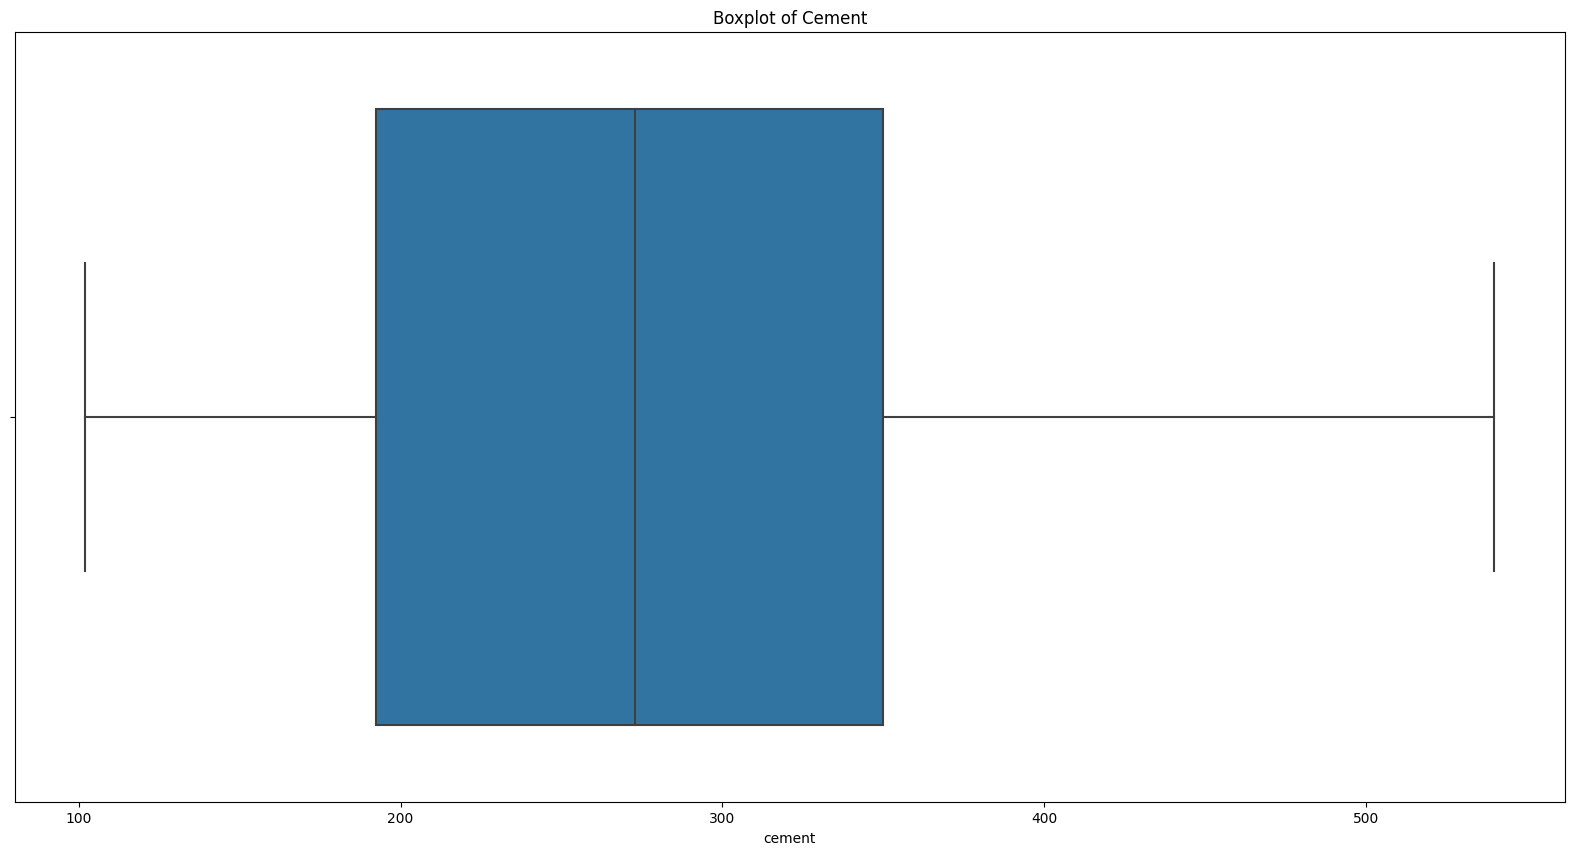

In [9]:
plt.figure(figsize= (20,10))
plt.title("Boxplot of Cement")
sns.boxplot(data=df, x = 'cement')

<Axes: title={'center': 'Boxplot of Ash'}, xlabel='ash'>

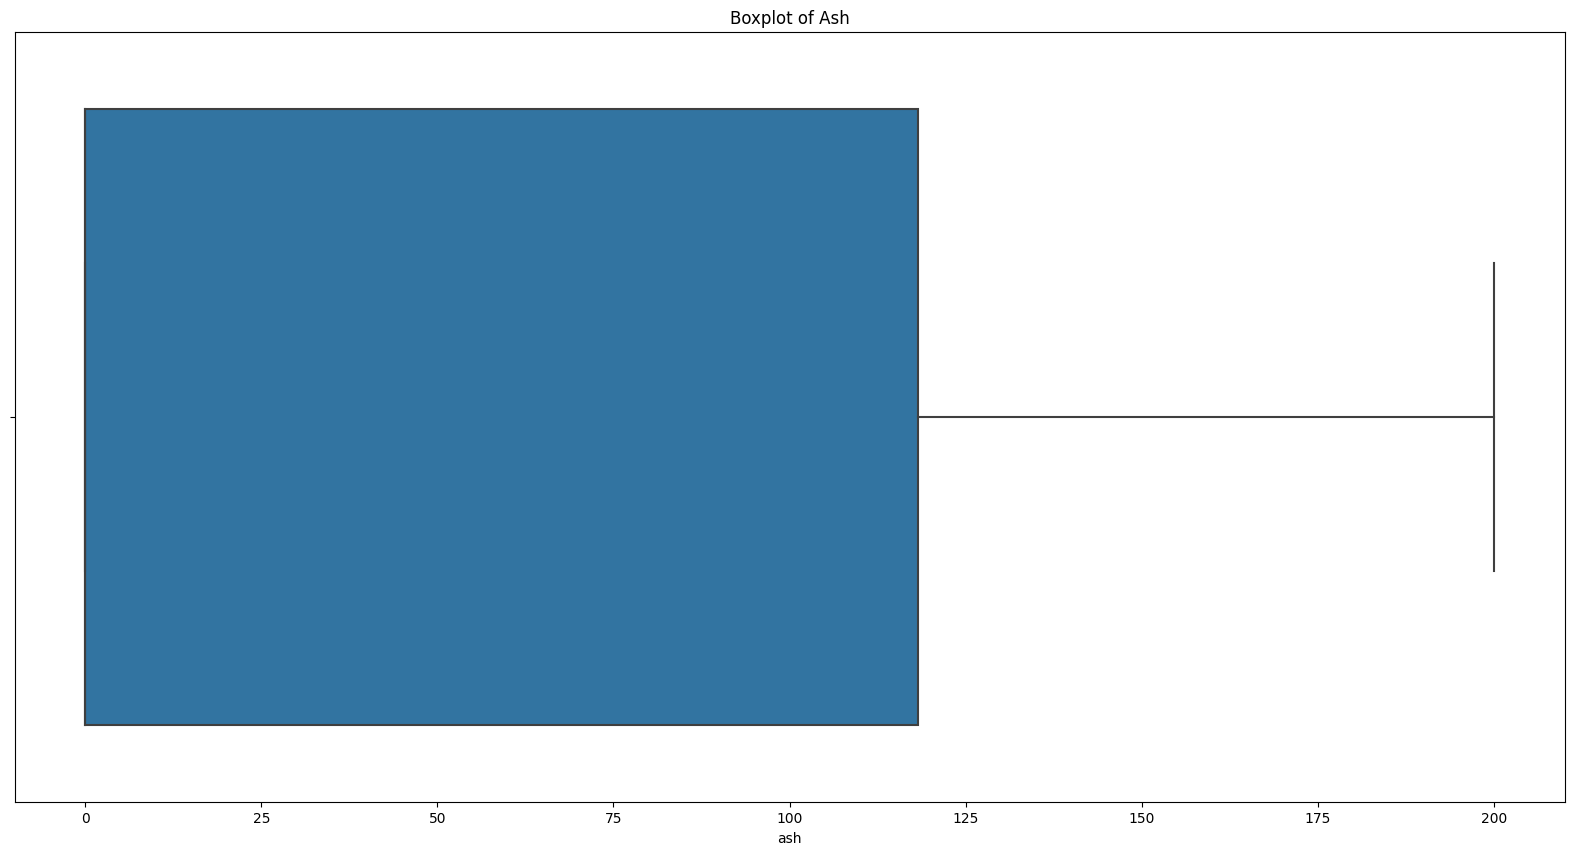

In [10]:
plt.figure(figsize= (20,10))
plt.title('Boxplot of Ash')
sns.boxplot(data = df, x = 'ash')

<Axes: title={'center': 'Boxplot of Water'}, xlabel='water'>

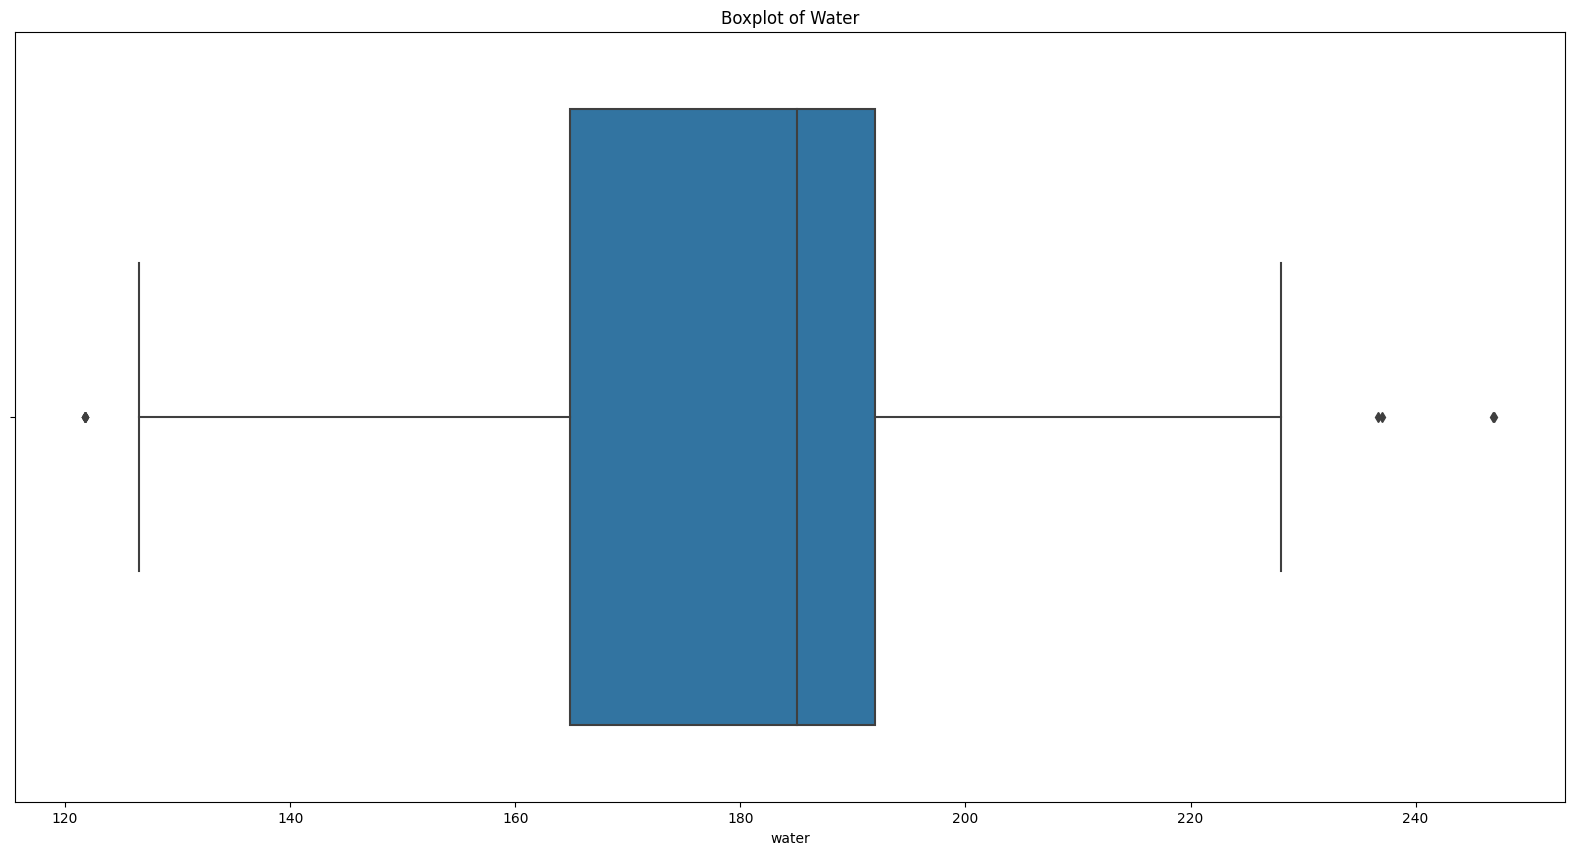

In [11]:
plt.figure(figsize= (20,10))
plt.title("Boxplot of Water")
sns.boxplot(data=df, x = 'water')

<Axes: title={'center': 'Boxplot of superplastic'}, xlabel='superplastic'>

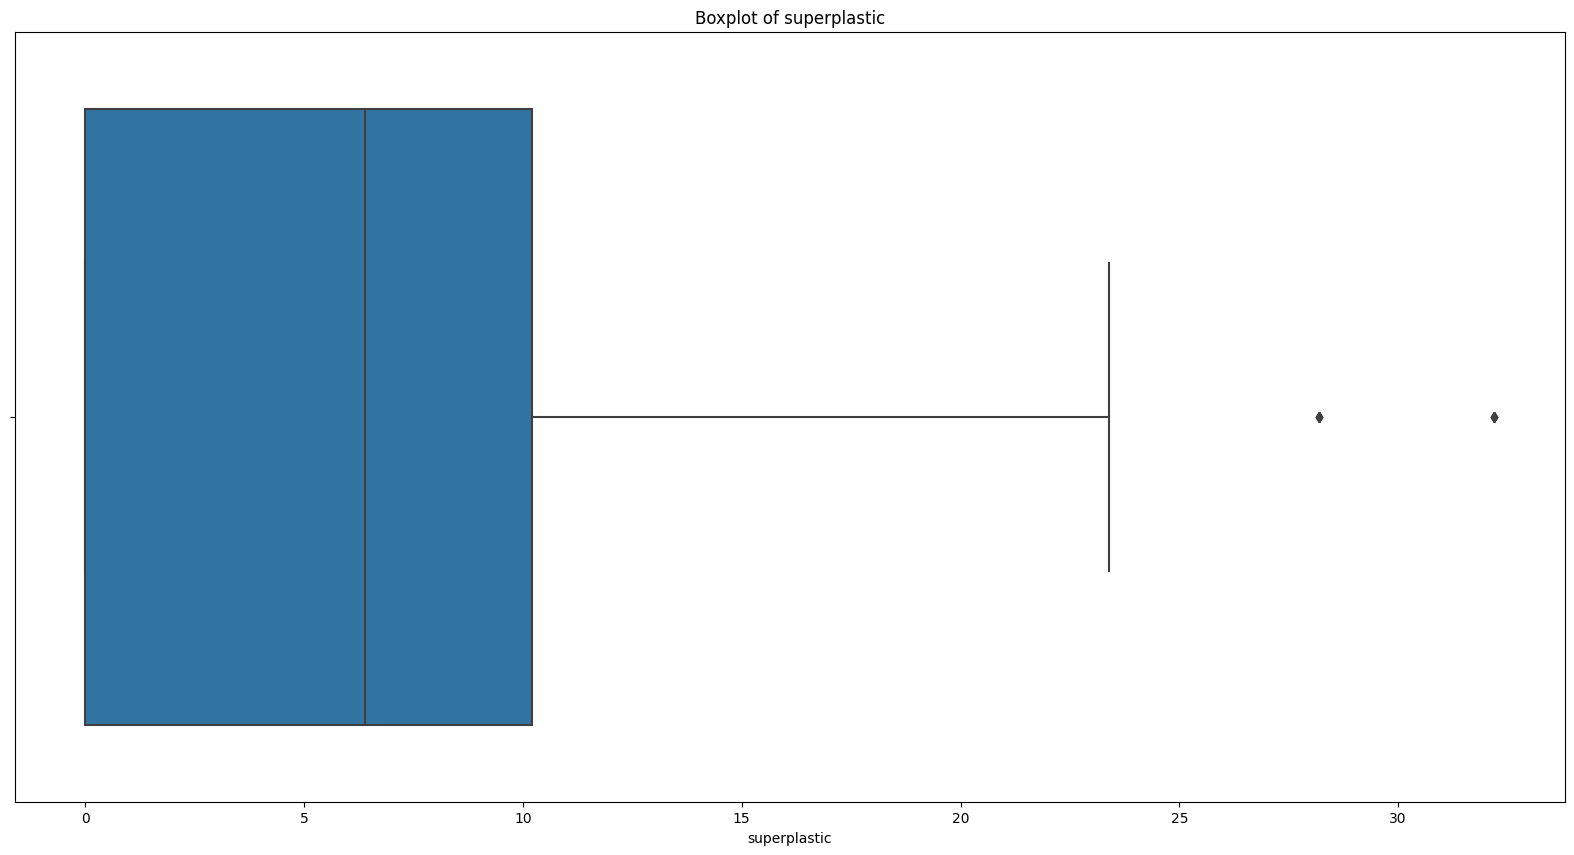

In [12]:
plt.figure(figsize = (20,10))
plt.title("Boxplot of superplastic")
sns.boxplot(data=df,x='superplastic')

<Axes: title={'center': 'Boxplot of coarseagg'}, xlabel='coarseagg'>

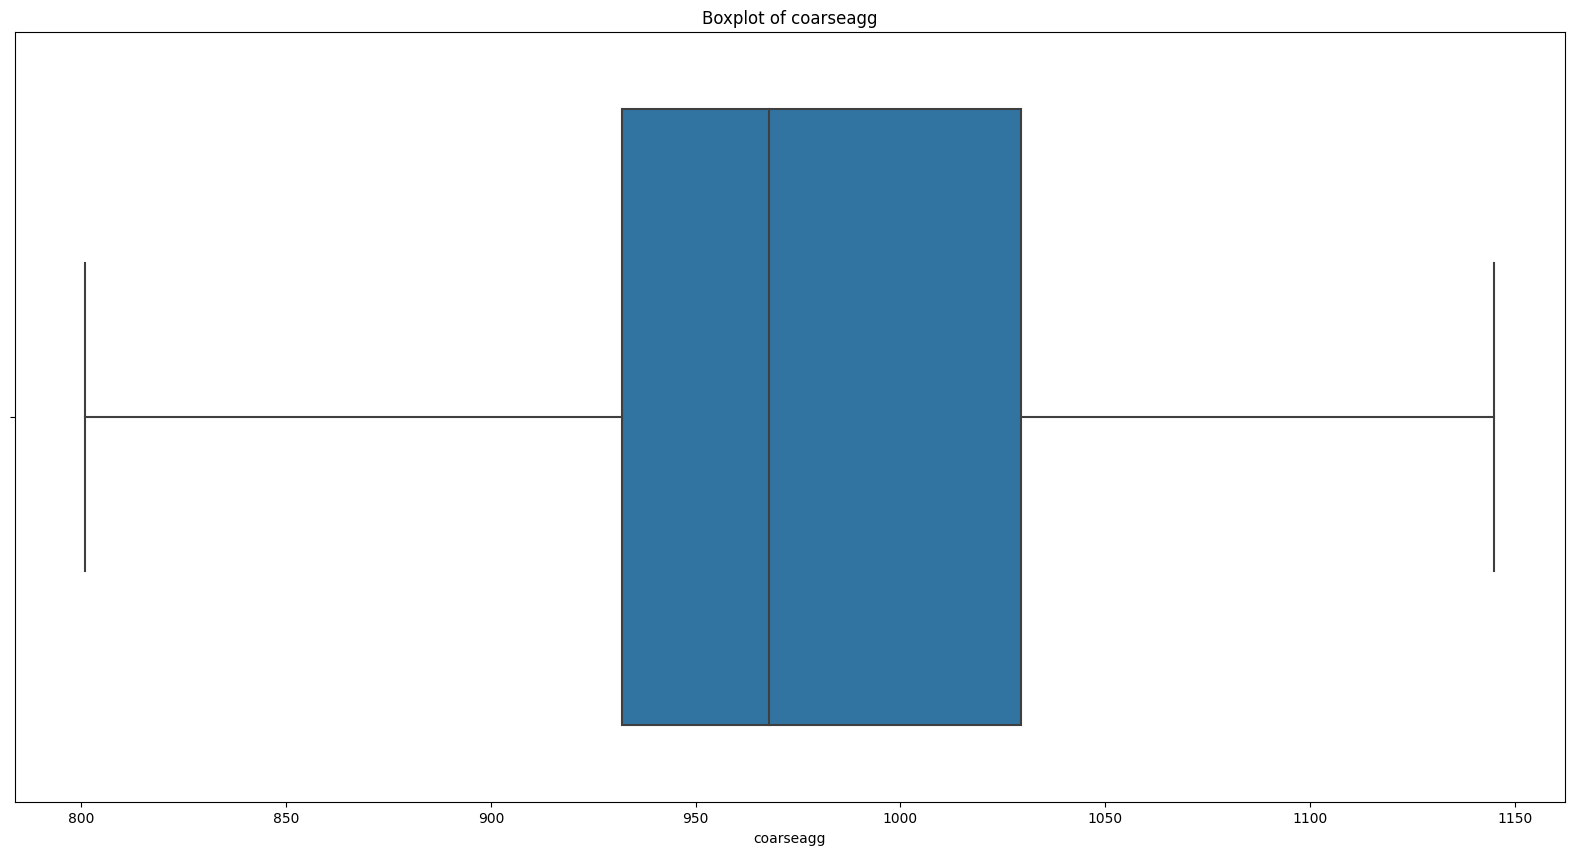

In [13]:
plt.figure(figsize=(20,10))
plt.title("Boxplot of coarseagg")
sns.boxplot(data=df,x = 'coarseagg')

<Axes: title={'center': 'Boxplot of fineagg'}, xlabel='fineagg'>

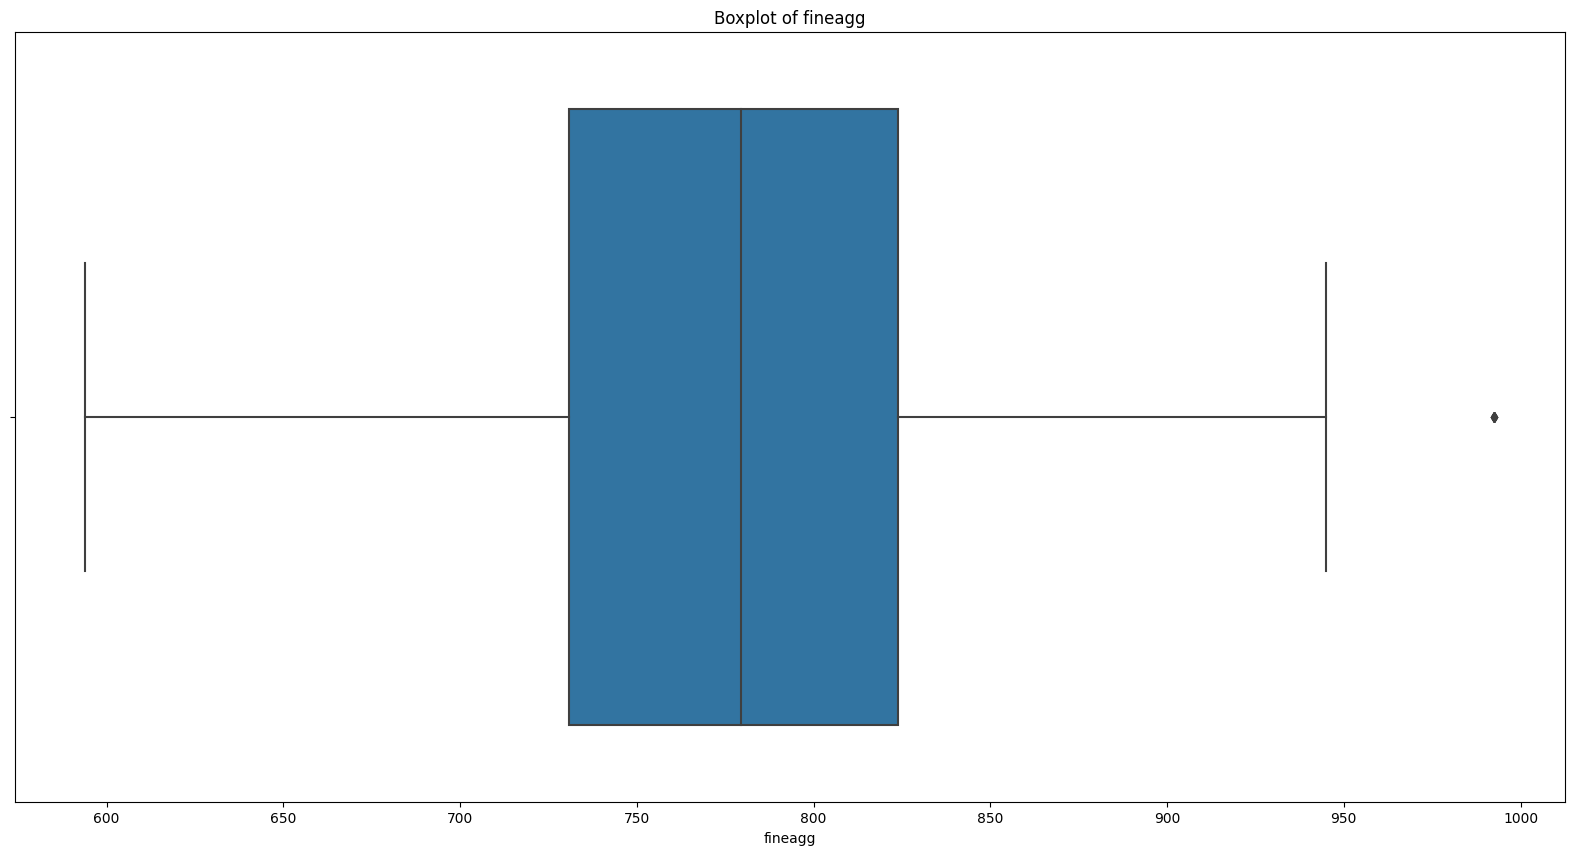

In [14]:
plt.figure(figsize=(20,10))
plt.title("Boxplot of fineagg")
sns.boxplot(data=df,x = 'fineagg')

<Axes: title={'center': 'Boxplot of age'}, xlabel='age'>

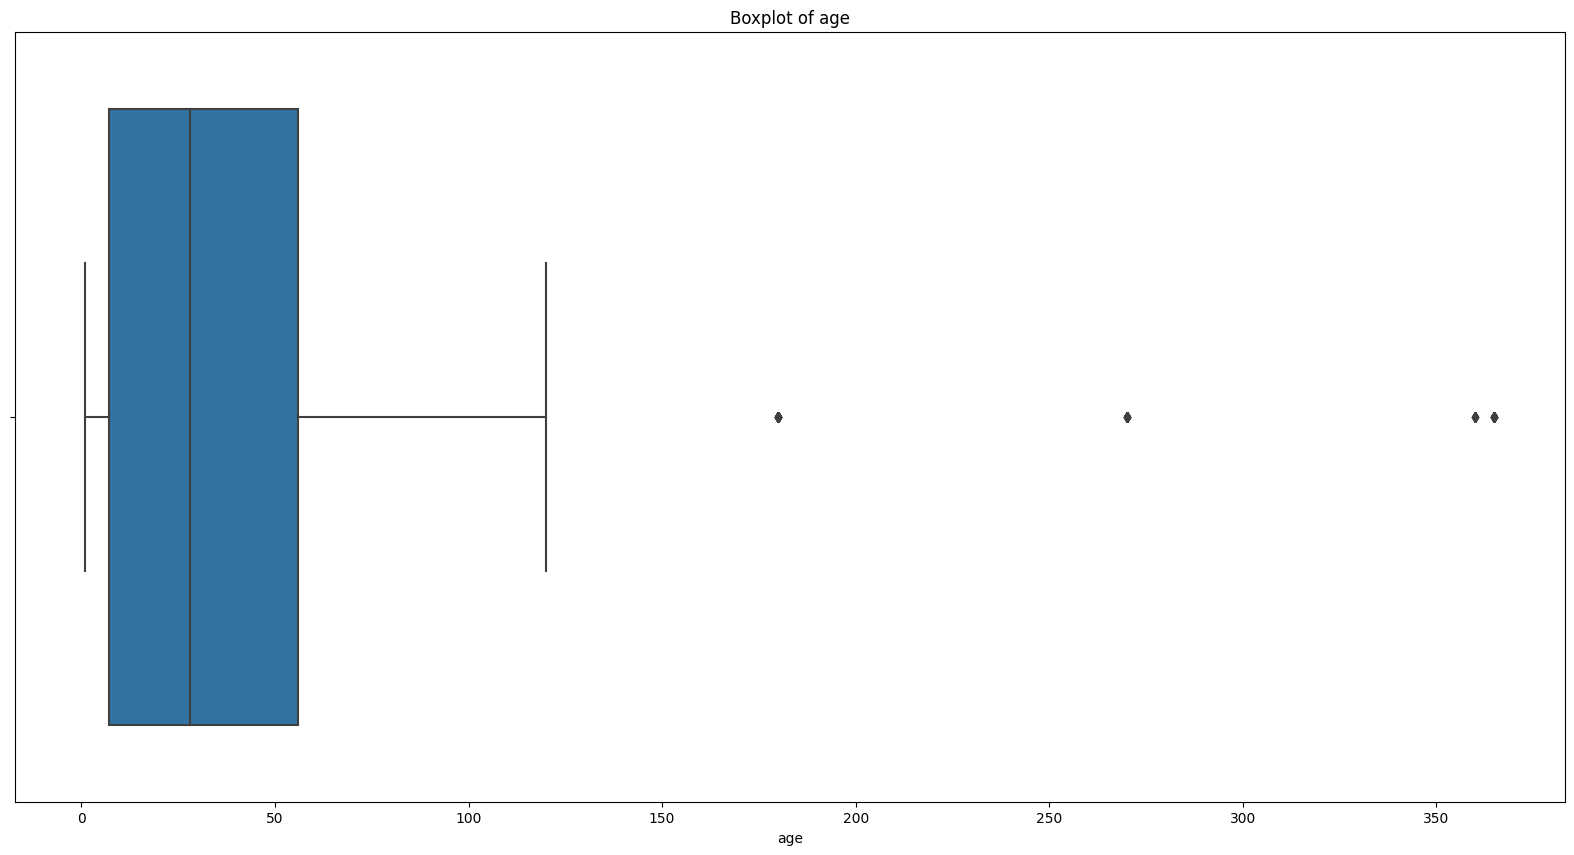

In [15]:
plt.figure(figsize=(20,10))
plt.title("Boxplot of age")
sns.boxplot(data=df,x = 'age')

<Axes: title={'center': 'Boxplot of strength'}, xlabel='strength'>

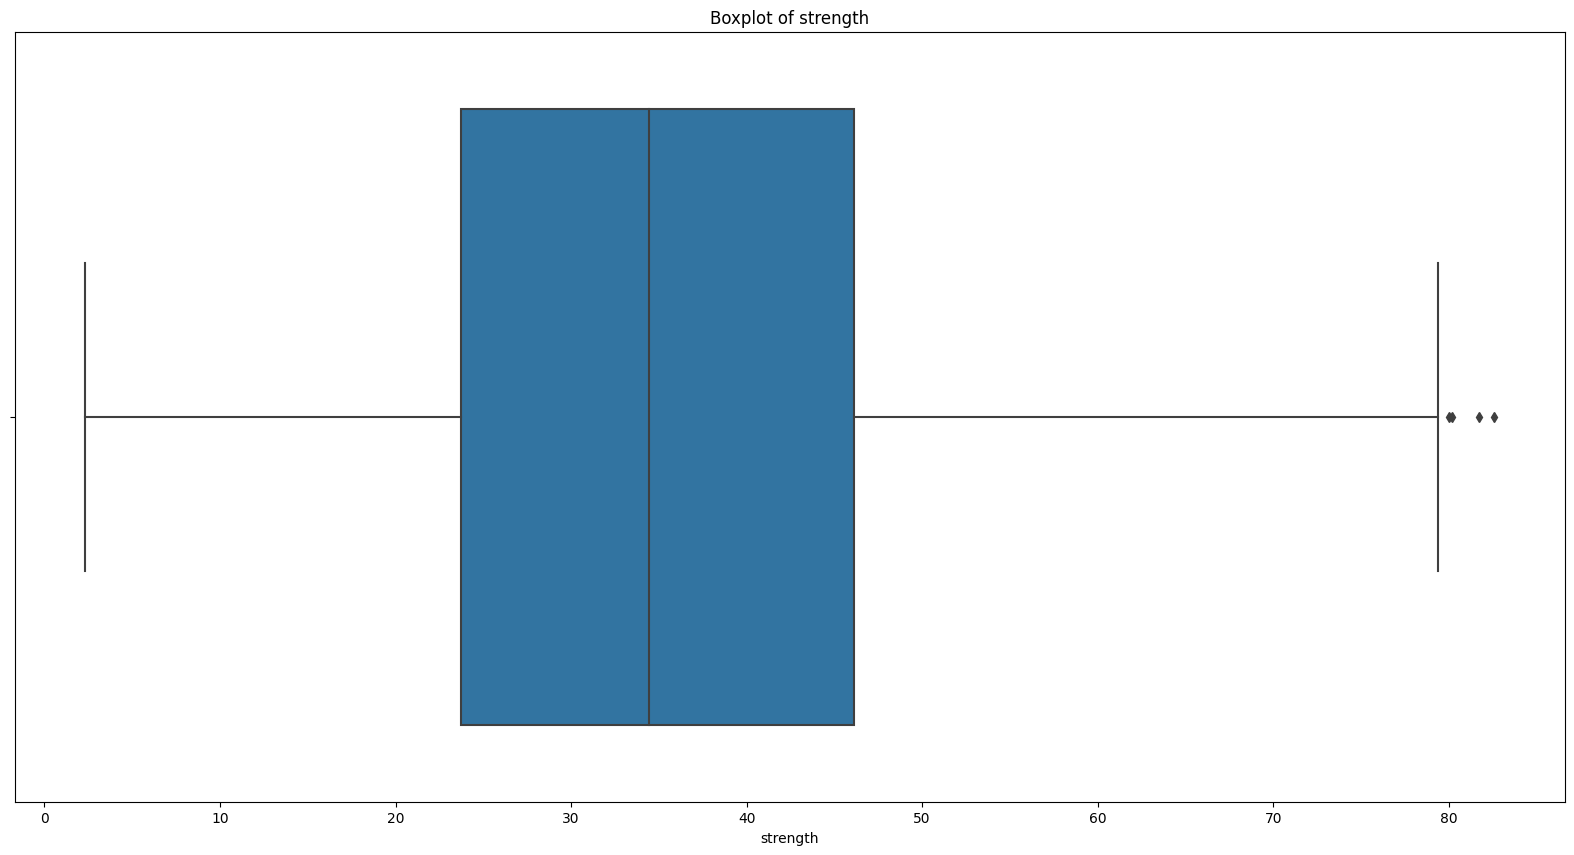

In [16]:
plt.figure(figsize=(20,10))
plt.title("Boxplot of strength")
sns.boxplot(data=df,x = 'strength')

It can be observed that the feature water, strength, age, slag, superplastic, fineagg contains outliers

### Data Cleaning

In [17]:
#removing the duplicate rows
df.drop_duplicates(inplace = True)

In [18]:
df[df['slag']>350]

cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
918   239.6  359.4  0.0  185.7           0.0      941.6    664.3   28   
990   239.6  359.4  0.0  185.7           0.0      941.6    664.3    7   

     strength  
918     39.44  
990     25.42

In [19]:
df = df.drop(df[df['slag']>350].index)

In [20]:
df[(df['water']<122) | (df['water']>230)]

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
66    237.0   92.0   71.0  247.0           6.0      853.0    695.0   28   
263   236.9   91.7   71.5  246.9           6.0      852.9    695.4   28   
432   168.0   42.1  163.8  121.8           5.7     1058.7    780.1   28   
462   168.0   42.1  163.8  121.8           5.7     1058.7    780.1  100   
587   168.0   42.1  163.8  121.8           5.7     1058.7    780.1    3   
740   140.0  164.0  128.0  237.0           6.0      869.0    656.0   28   
789   168.0   42.1  163.8  121.8           5.7     1058.7    780.1   56   
826   139.7  163.9  127.7  236.7           5.8      868.6    655.6   28   
914   168.0   42.1  163.8  121.8           5.7     1058.7    780.1   14   

     strength  
66      28.63  
263     28.63  
432     24.24  
462     39.23  
587      7.75  
740     35.23  
789     32.85  
826     35.23  
914     17.82

In [21]:
df = df.drop(df[(df['water']<122) | (df['water']>230)].index)

In [22]:
df[df['superplastic']>25]

cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
44     531.3    0.0  0.0  141.8          28.2      852.1    893.7   91   
156    531.3    0.0  0.0  141.8          28.2      852.1    893.7   28   
232    469.0  117.2  0.0  137.8          32.2      852.1    840.5   56   
292    469.0  117.2  0.0  137.8          32.2      852.1    840.5   91   
538    531.3    0.0  0.0  141.8          28.2      852.1    893.7    7   
744    469.0  117.2  0.0  137.8          32.2      852.1    840.5    7   
816    469.0  117.2  0.0  137.8          32.2      852.1    840.5   28   
838    531.3    0.0  0.0  141.8          28.2      852.1    893.7   56   
955    469.0  117.2  0.0  137.8          32.2      852.1    840.5    3   
1026   531.3    0.0  0.0  141.8          28.2      852.1    893.7    3   

      strength  
44        59.2  
156       56.4  
232       69.3  
292       70.7  
538       46.9  
744       54.9  
816       66.9  
838       58.8  
955       40.2  
1026      41.3

In [23]:
df = df.drop(df[df['superplastic']>25].index)

In [24]:
df[df['fineagg']>950]

cement  slag  ash  water  superplastic  coarseagg  fineagg  age  strength
129   375.0  93.8  0.0  126.6          23.4      852.1    992.6   91      62.5
447   375.0  93.8  0.0  126.6          23.4      852.1    992.6    7      45.7
504   375.0  93.8  0.0  126.6          23.4      852.1    992.6    3      29.0
584   375.0  93.8  0.0  126.6          23.4      852.1    992.6   56      60.2
857   375.0  93.8  0.0  126.6          23.4      852.1    992.6   28      56.7

In [25]:
df = df.drop(df[df['fineagg']>950].index)

In [26]:
df[df['age']>150]

cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
51     331.0    0.0  0.0  192.0           0.0      978.0    825.0  180   
64     332.5  142.5  0.0  228.0           0.0      932.0    594.0  365   
93     427.5   47.5  0.0  228.0           0.0      932.0    594.0  180   
99     237.5  237.5  0.0  228.0           0.0      932.0    594.0  180   
103    380.0    0.0  0.0  228.0           0.0      932.0    670.0  180   
133    236.0    0.0  0.0  193.0           0.0      968.0    885.0  365   
144    302.0    0.0  0.0  203.0           0.0      974.0    817.0  180   
149    380.0   95.0  0.0  228.0           0.0      932.0    594.0  270   
152    322.0    0.0  0.0  203.0           0.0      974.0    800.0  180   
157    198.6  132.4  0.0  192.0           0.0      978.4    825.5  360   
159    304.0   76.0  0.0  228.0           0.0      932.0    670.0  365   
198    266.0  114.0  0.0  228.0           0.0      932.0    670.0  365   
199    277.0    0.0  0.0  191.0           0.0      968.0    856.0  180   
207    190.0  190.0  0.0  228.0           0.0      932.0    670.0  180   
256    525.0    0.0  0.0  189.0           0.0     1125.0    613.0  270   
262    266.0  114.0  0.0  228.0           0.0      932.0    670.0  270   
270    500.0    0.0  0.0  200.0           0.0     1125.0    613.0  270   
297    475.0    0.0  0.0  228.0           0.0      932.0    594.0  270   
302    342.0   38.0  0.0  228.0           0.0      932.0    670.0  180   
312    236.0    0.0  0.0  193.0           0.0      968.0    885.0  180   
313    540.0    0.0  0.0  173.0           0.0     1125.0    613.0  270   
323    139.6  209.4  0.0  192.0           0.0     1047.0    806.9  360   
359    475.0    0.0  0.0  228.0           0.0      932.0    594.0  180   
361    277.0    0.0  0.0  191.0           0.0      968.0    856.0  360   
370    266.0  114.0  0.0  228.0           0.0      932.0    670.0  180   
393    342.0   38.0  0.0  228.0           0.0      932.0    670.0  365   
448    331.0    0.0  0.0  192.0           0.0      978.0    825.0  360   
465    427.5   47.5  0.0  228.0           0.0      932.0    594.0  365   
484    237.5  237.5  0.0  228.0           0.0      932.0    594.0  365   
539    304.0   76.0  0.0  228.0           0.0      932.0    670.0  180   
570    190.0  190.0  0.0  228.0           0.0      932.0    670.0  270   
581    525.0    0.0  0.0  189.0           0.0     1125.0    613.0  180   
594    339.0    0.0  0.0  197.0           0.0      968.0    781.0  180   
601    339.0    0.0  0.0  197.0           0.0      968.0    781.0  365   
620    332.5  142.5  0.0  228.0           0.0      932.0    594.0  180   
622    380.0   95.0  0.0  228.0           0.0      932.0    594.0  180   
623    380.0    0.0  0.0  228.0           0.0      932.0    670.0  270   
632    304.0   76.0  0.0  228.0           0.0      932.0    670.0  270   
642    198.6  132.4  0.0  192.0           0.0      978.4    825.5  180   
696    307.0    0.0  0.0  193.0           0.0      968.0    812.0  180   
713    190.0  190.0  0.0  228.0           0.0      932.0    670.0  365   
720    380.0   95.0  0.0  228.0           0.0      932.0    594.0  365   
721    500.0    0.0  0.0  200.0           0.0     1125.0    613.0  180   
754    254.0    0.0  0.0  198.0           0.0      968.0    863.0  365   
755    349.0    0.0  0.0  192.0           0.0     1047.0    806.0  360   
776    540.0    0.0  0.0  173.0           0.0     1125.0    613.0  180   
850    427.5   47.5  0.0  228.0           0.0      932.0    594.0  270   
861    310.0    0.0  0.0  192.0           0.0      970.0    850.0  180   
878    237.5  237.5  0.0  228.0           0.0      932.0    594.0  270   
900    254.0    0.0  0.0  198.0           0.0      968.0    863.0  180   
901    475.0    0.0  0.0  228.0           0.0      932.0    594.0  365   
919    310.0    0.0  0.0  192.0           0.0      970.0    850.0  360   
951    332.5  142.5  0.0  228.0           0.0      932.0    594.0  270   
957    307

In [27]:
df = df.drop(df[df['age']>150].index)

In [28]:
df[df['strength']>77]

cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
190    362.6  189.0  0.0  164.9          11.6      944.7    755.8   56   
192    315.0  137.0  0.0  145.0           5.9     1130.0    745.0   28   
245    362.6  189.0  0.0  164.9          11.6      944.7    755.8   91   
257    389.9  189.0  0.0  145.9          22.0      944.7    755.8   56   
506    451.0    0.0  0.0  165.0          11.3     1030.0    745.0   28   
732    540.0    0.0  0.0  162.0           2.5     1040.0    676.0   28   
950    389.9  189.0  0.0  145.9          22.0      944.7    755.8   91   
1003   323.7  282.8  0.0  183.8          10.3      942.7    659.9   56   

      strength  
190      77.30  
192      81.75  
245      79.30  
257      79.40  
506      78.80  
732      79.99  
950      82.60  
1003     80.20

In [29]:
df = df.drop(df[df['strength']>77].index)

<Axes: >

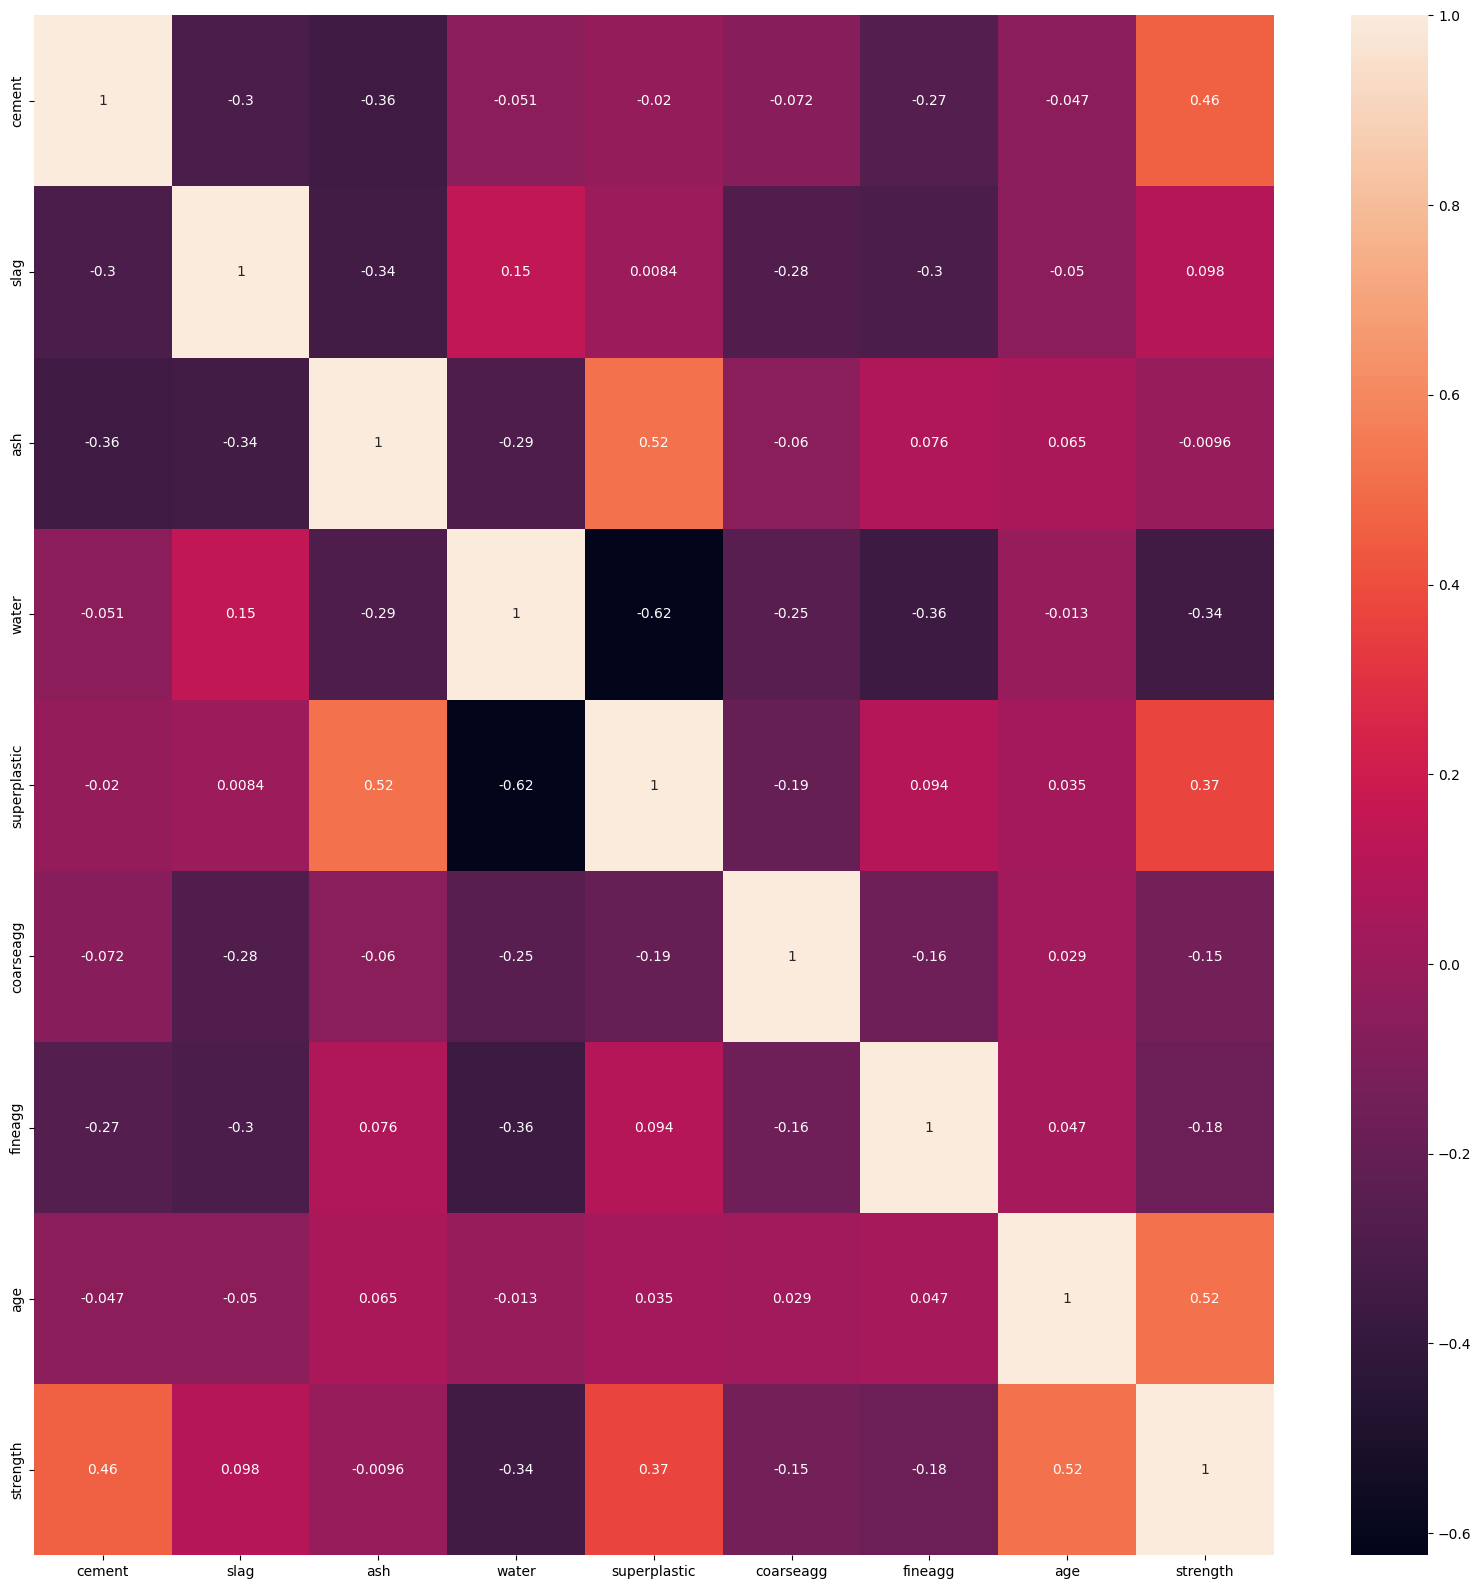

In [30]:
plt.figure(figsize = (20,20))
sns.heatmap(data=df.corr(), annot = True)

In [31]:
#Checking the Correlation (Method 1)
df.corr()['strength'].sort_values()[:-1]

water          -0.341547
fineagg        -0.177657
coarseagg      -0.145014
ash            -0.009634
slag            0.097929
superplastic    0.366303
cement          0.457322
age             0.518094
Name: strength, dtype: float64

In [32]:
#Checking the Correlation (Method 2)

features = df.drop(columns = ['strength']).columns.tolist()
target = df['strength']

for feature in features:
    feature_column = df[feature]
    correlation = (feature_column.corr(target)).round(2)*100
    print(f"Correlation between {feature} and strength: {correlation} %")

Correlation between cement and strength: 46.0 %
Correlation between slag and strength: 10.0 %
Correlation between ash and strength: -1.0 %
Correlation between water and strength: -34.0 %
Correlation between superplastic and strength: 37.0 %
Correlation between coarseagg and strength: -15.0 %
Correlation between fineagg and strength: -18.0 %
Correlation between age and strength: 52.0 %


### Data Preprocessing

In [33]:
features = df.drop(columns = ['strength'])
target = df['strength']

x_train,x_test,y_train, y_test = train_test_split(features,target, test_size = 0.2, random_state = 12)

In [34]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Model Training

In [35]:
rf = RandomForestRegressor()

rf.fit(x_train,y_train)

RandomForestRegressor()

### Prediction

In [36]:
predict = rf.predict(x_test)

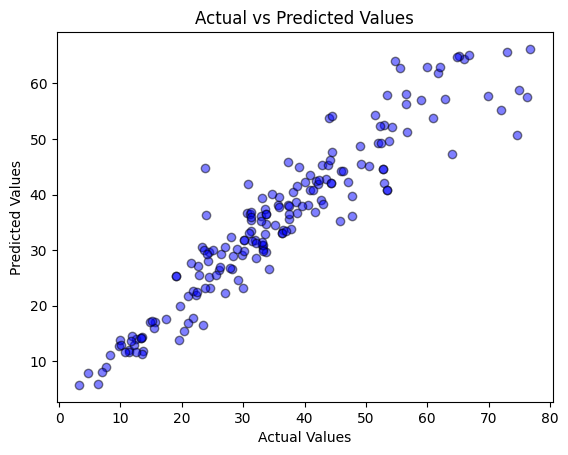

In [37]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predict, alpha = 0.5, color = 'blue', edgecolors = 'k')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("Actual vs Predicted Values")
plt.show()

In [38]:
print("Mean Absolute Error: ", (mean_absolute_error(y_test,predict)).round(2))
print("R2 Score: ", (r2_score(y_test,predict)).round(2))

Mean Absolute Error:  3.82
R2 Score:  0.88
